In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
import pymc3 as pm
import arviz as az
from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, accuracy_score, f1_score,precision_recall_curve) 
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

In [61]:
# customer churn dataset
df = pd.read_csv(r'C:\Users\vidha\Desktop\IISc\CP218 - Theory and applications of bayesian learning\Project2\Datasets\Iranian-Churn-Dataset-Data-Set\Customer Churn.csv')
print(df)

      Call Failure  Complains  Subscription Length  Charge Amount  \
0                8          0                   38              0   
1                0          0                   39              0   
2               10          0                   37              0   
3               10          0                   38              0   
4                3          0                   38              0   
...            ...        ...                  ...            ...   
3145            21          0                   19              2   
3146            17          0                   17              1   
3147            13          0                   18              4   
3148             7          0                   11              2   
3149             8          1                   11              2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1                318                 5             

In [62]:
# customer churn dataset
df_selected = df[['Call Failure','Complains', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers','Status', 'Customer Value','Churn']]

In [63]:
df_selected.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,1,197.640,0
1,0,0,39,0,318,5,7,4,2,46.035,0
2,10,0,37,0,2453,60,359,24,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,145.805,0


In [64]:
df_selected.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,1.248254,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.432069,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,1.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,1.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,1.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,2.000000,2165.280000,1.000000


In [65]:
# customer churn dataset
df_selected.corr()['Churn']

Call Failure              -0.008987
Complains                  0.532053
Subscription Length       -0.032588
Charge Amount             -0.202305
Seconds of Use            -0.298935
Frequency of use          -0.303337
Frequency of SMS          -0.220754
Distinct Called Numbers   -0.278867
Status                     0.498976
Customer Value            -0.289144
Churn                      1.000000
Name: Churn, dtype: float64

In [66]:
columns = list(df_selected.columns)

In [67]:
# customer churn dataset
corr_list = list(abs(df_selected.corr()['Churn']))[0:-1]

In [68]:
print(corr_list)

[0.008987368410099486, 0.5320529624895491, 0.03258789382847463, 0.20230536335972502, 0.29893454438239075, 0.3033373426585388, 0.22075364010011675, 0.27886686733749233, 0.49897561120776823, 0.28914423834228486]


In [69]:
array_selected = df_selected.values
print(np.shape(array_selected))

(3150, 11)


In [70]:
# customer churn dataset
input_idx = [0,1,2,3,4,5,6,7,8,9]
output_idx = [10]

In [71]:
X = array_selected[:,input_idx]
y = array_selected[:,output_idx].astype('int')

In [72]:
def choose_features(num_of_features_choosen):
    temp1 = list(np.argsort(corr_list)[::-1][:num_best_features])
    temp2 = [input_idx[val] for val in temp1]
    choosen_features = [columns[val] for val in temp2]
    return choosen_features

In [73]:
num_best_features = 10
choosen_features = choose_features(num_best_features)
print("\nchoosen features :\n",choosen_features)
input_features = np.array(df_selected[choosen_features]).reshape(-1,len(choosen_features))
output_features = np.array(df_selected[['Churn']]).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(input_features, output_features, test_size = 0.25)

scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)


choosen features :
 ['Complains', 'Status', 'Frequency of use', 'Seconds of Use', 'Customer Value', 'Distinct Called Numbers', 'Frequency of SMS', 'Charge Amount', 'Subscription Length', 'Call Failure']


[0.45, 0.17, 0.13, 0.1, 0.06, 0.04, 0.02, 0.02, 0.0, 0.0]


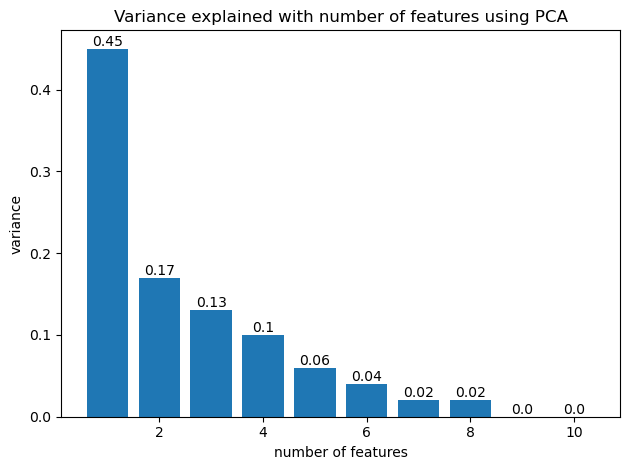

In [74]:
pca = PCA()
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_
explained_variance=[round(elem,2) for elem in explained_variance]
print(explained_variance)
x_bar = [i for i in range(1,len(explained_variance)+1)]
fig = plt.bar(x =x_bar, height=explained_variance)
plt.bar_label(labels=explained_variance,container=fig)

plt.title('Variance explained with number of features using PCA')
plt.xlabel("number of features")
plt.ylabel("variance")
plt.tight_layout()

In [47]:
# num_best_features = 4
# pca = PCA(n_components=num_best_features)
# X_train_scaled = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)

In [75]:
n = 1
poly = PolynomialFeatures(degree = n, interaction_only=False, include_bias=False)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.fit_transform(X_test_scaled)

In [76]:
np.shape(X_train_scaled_poly)

(2362, 10)

In [77]:
with pm.Model() as logistic_model:
    # priors on model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=100)
    beta = pm.Normal('beta', mu=0, sigma=100, shape=np.shape(X_train_scaled_poly)[1])

    likelihood = pm.math.sigmoid(alpha + pm.math.dot(X_train_scaled_poly,beta))
    y_obs = pm.Bernoulli('y_obs', p=likelihood, observed=y_train_scaled.flatten())
    
    # perform inference
    trace = pm.sample(1000, tune=1000, chains=4)

C:\Users\vidha\AppData\Local\Temp\ipykernel_30932\146328421.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, tune=1000, chains=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 175 seconds.


C:\Users\vidha\anaconda3\envs\BL_pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


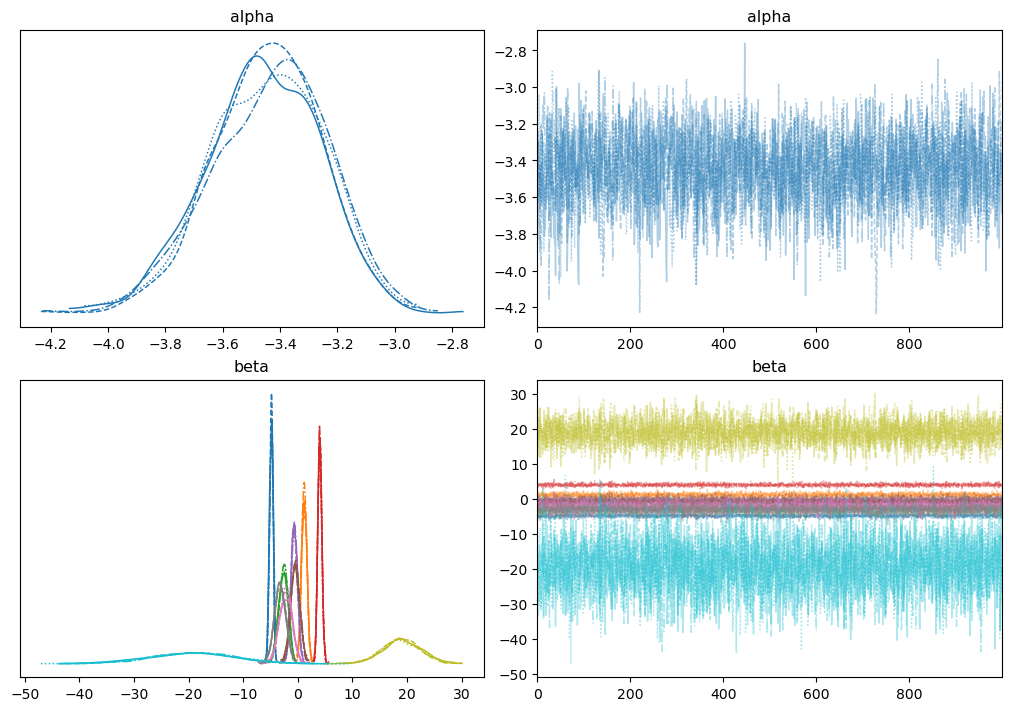

In [78]:
axes = az.plot_trace(trace, figsize=(10, 7))

In [79]:
fig = axes.ravel()[0].figure
fig.savefig('plots\MCMC_logistic_trace_plot.jpg',dpi=150)

In [80]:
MAP_parameters = pm.find_MAP(model=logistic_model)
print(MAP_parameters)


{'alpha': array(-3.36484621), 'beta': array([ -4.69281231,   1.21128358,  -2.53990718,   3.94884906,
        -0.6046497 ,  -0.39876851,  -2.2660623 ,  -3.04847324,
        18.85914665, -18.76436486])}


In [81]:
pm.summary(trace).round(2)

C:\Users\vidha\anaconda3\envs\BL_pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-3.45,0.20,-3.83,-3.09,0.00,0.00,1888.0,2450.0,1.0
beta[0],-4.83,0.33,-5.45,-4.22,0.01,0.00,1967.0,2577.0,1.0
beta[1],1.19,0.47,0.28,2.05,0.01,0.01,2937.0,2592.0,1.0
beta[2],-2.64,0.85,-4.26,-1.11,0.02,0.01,2526.0,2628.0,1.0
beta[3],4.04,0.36,3.41,4.78,0.01,0.00,3167.0,2641.0,1.0
beta[4],-0.65,0.59,-1.74,0.45,0.01,0.01,3513.0,3040.0,1.0
beta[5],-0.45,0.83,-1.96,1.12,0.01,0.01,3659.0,3132.0,1.0
beta[6],-2.22,1.15,-4.28,-0.04,0.02,0.01,4241.0,3328.0,1.0
beta[7],-3.24,1.04,-5.06,-1.16,0.02,0.01,3725.0,3138.0,1.0
beta[8],19.02,3.44,12.88,25.81,0.06,0.04,3230.0,3037.0,1.0


In [82]:
intercept = []
coeff = []
for key,val in MAP_parameters.items():
    if key=='alpha':
        intercept.append(val.tolist())
    if key=='beta':
        coeff = val.tolist()

In [83]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [84]:
coeff = np.array(coeff).reshape(-1,1)
y_pred = sigmoid(intercept[0] + np.dot(X_test_scaled_poly,coeff))

In [88]:
predictions = []
for elem in y_pred.flatten().tolist():
    if(elem<0.5):
        predictions.append(0)
    else:
        predictions.append(1)
        
y_pred_scaled = np.array(predictions).reshape(-1,1)
fscore = f1_score(y_test_scaled,y_pred_scaled)
print("f score :",fscore)

f score : 0.6310679611650486


In [86]:
correct = 0
for i in range(len(predictions)):
    if(predictions[i]==list(y_test_scaled.flatten())[i]):
        correct = correct + 1

print("accuracy : ", correct/len(predictions))

accuracy :  0.9035532994923858
